In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from fancyimpute import KNN
from scipy.stats import chi2_contingency

C:\Users\user\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
df=pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [9]:
df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [79]:
y=boston['target']    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [21]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Removing outliers

# After df.describe(), we get to know that some features have outliers which need to be removed

In [26]:
out=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

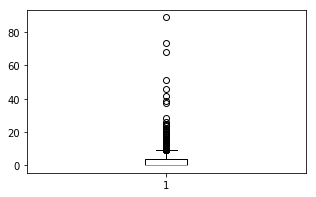

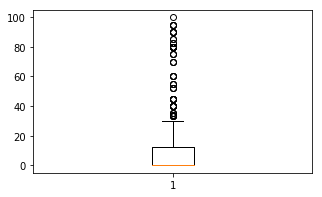

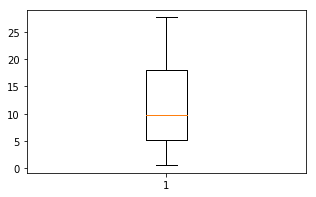

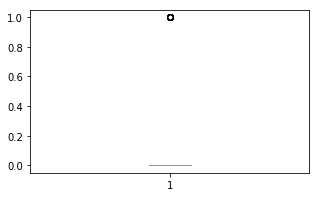

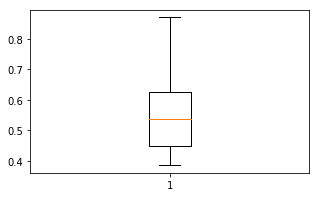

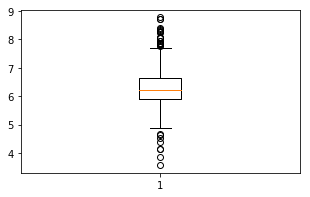

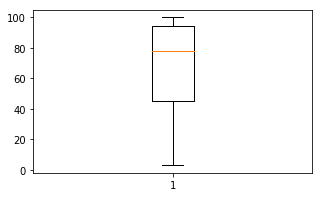

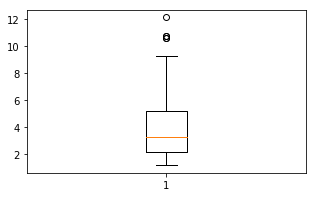

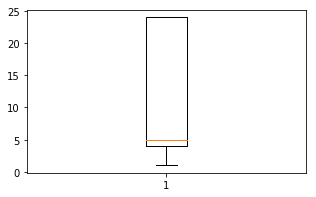

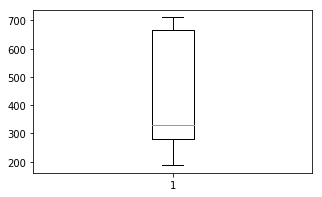

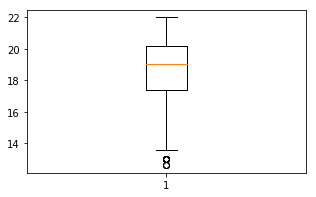

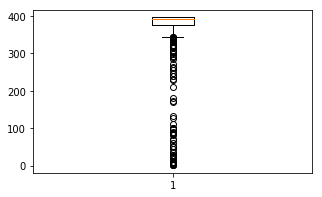

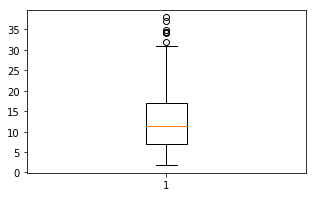

In [27]:
for i in out:
    plt.figure(figsize=(5,3))
    plt.boxplot(df[i])

In [32]:
for i in out:
    q75,q25=np.percentile(df.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    df.loc[df.loc[:,i]<min,i]=np.nan
    df.loc[df.loc[:,i]>max,i]=np.nan
    print(i, 'missing value :', df.loc[:,i].isnull().sum())

CRIM missing value : 65
ZN missing value : 68
INDUS missing value : 0
CHAS missing value : 35
NOX missing value : 0
RM missing value : 30
AGE missing value : 0
DIS missing value : 5
RAD missing value : 0
TAX missing value : 0
PTRATIO missing value : 15
B missing value : 77
LSTAT missing value : 7


C:\Users\user\Anaconda\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


# Imputing missing values

In [53]:
#calculating missing values in each variables and save it in cdf
cdf=pd.DataFrame(df.isnull().sum())
cdf=cdf.sort_values(0, ascending=False)
cdf=cdf.rename(columns={0:'missing_percentage'})
print(cdf)

         missing_percentage
B                        77
ZN                       68
CRIM                     65
CHAS                     35
RM                       30
PTRATIO                  15
LSTAT                     7
DIS                       5
INDUS                     0
NOX                       0
AGE                       0
RAD                       0
TAX                       0


In [54]:
#Replacing all outliers with mean
for i in out:
    df[i]=df[i].fillna(df[i].mean())

In [55]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [59]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Exploratory Data Analysis

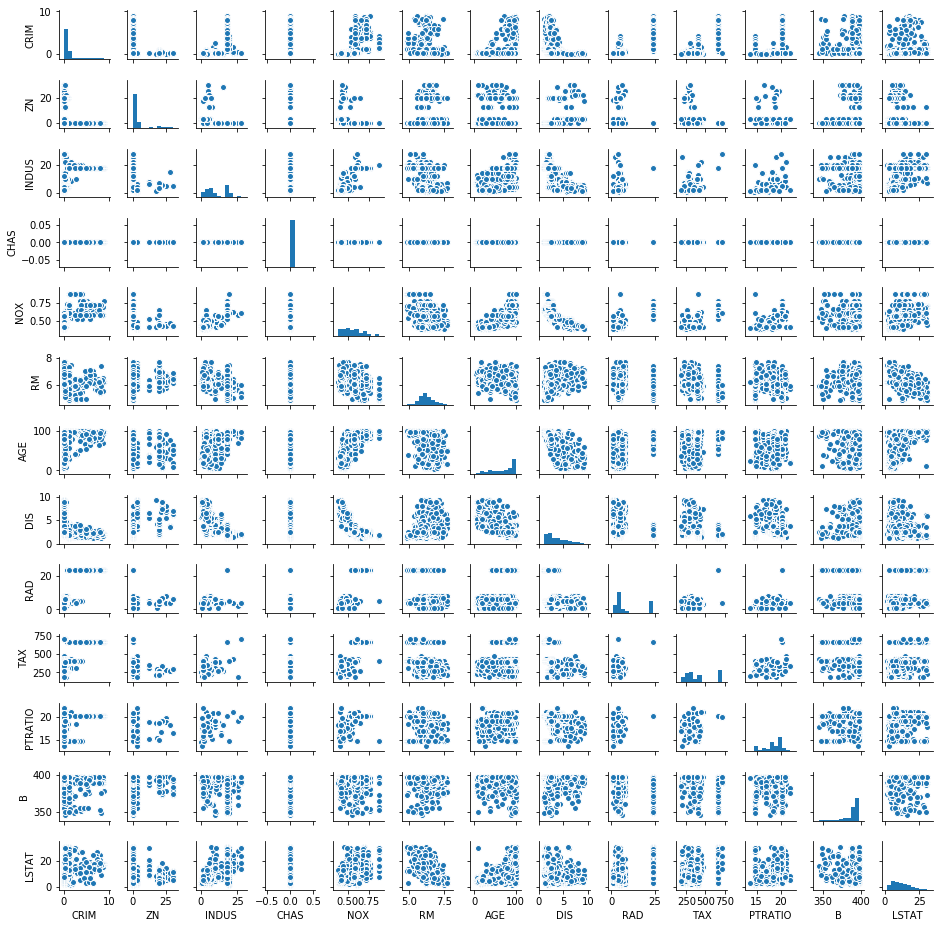

In [57]:
sns.pairplot(df,size=1)

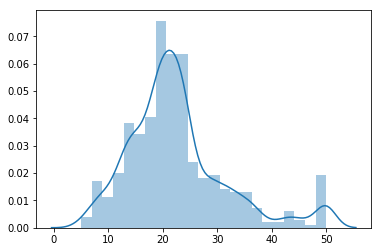

In [60]:
#Distribution of target variables which seems to be Uniform
sns.distplot(y)

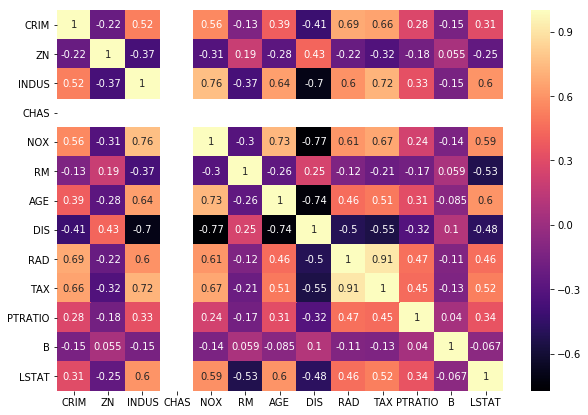

In [71]:
#Checking correlation between the variables and removing the most correlated one.
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,cmap='magma')

In [74]:
#So, RAD & TAX seem to be most correlated, Hence removing TAX from df
df=df.drop('TAX', axis=1)

In [120]:
df.shape

(506, 12)

In [76]:
#Scaling of variables
from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler().fit(df)
scaled_features=scaler.transform(df)
df_feat=pd.DataFrame(scaled_features, columns=df.columns)
print(df_feat)

             CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
0   -6.007031e-01  2.037122 -1.287909   0.0 -0.144217  0.661131 -0.120013   
1   -5.901149e-01 -0.439275 -0.593381   0.0 -0.740262  0.363244  0.367166   
2   -5.901250e-01 -0.439275 -0.593381   0.0 -0.740262  1.841073 -0.265812   
3   -5.875624e-01 -0.439275 -1.306878   0.0 -0.835284  1.479353 -0.809889   
4   -5.690595e-01 -0.439275 -1.306878   0.0 -0.835284  1.767568 -0.511180   
5   -5.888336e-01 -0.439275 -1.306878   0.0 -0.835284  0.380653 -0.351157   
6   -5.593540e-01  1.280446 -0.476654   0.0 -0.265154 -0.427898 -0.070229   
7   -5.309741e-01  1.280446 -0.476654   0.0 -0.265154 -0.118405  0.978808   
8   -4.973329e-01  1.280446 -0.476654   0.0 -0.265154 -1.164878  1.117494   
9   -5.181159e-01  1.280446 -0.476654   0.0 -0.265154 -0.443372  0.616090   
10  -4.904472e-01  1.280446 -0.476654   0.0 -0.265154  0.278133  0.914799   
11  -5.446344e-01  1.280446 -0.476654   0.0 -0.265154 -0.433701  0.509409   

In [110]:
from sklearn.cross_validation import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=101)

In [112]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

X_train.to_csv('X_train', index=False)
X_test.to_csv('X_test', index=False)
y_train.to_csv('y_train', index=False)
y_test.to_csv('y_test', index=False)

In [113]:
os.getcwd()

'C:\\Users\\user'

# Let's try Linear Regression:

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lm=LinearRegression()

In [116]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
#lm.coef_
coef=pd.DataFrame(lm.coef_)#,index=df.columns, columns=['coeff'])

In [141]:
predict=lm.predict(X_test)

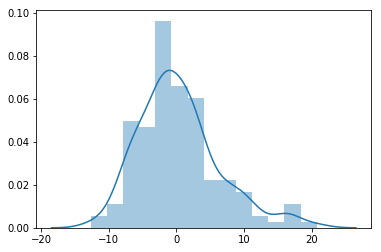

In [142]:
sns.distplot((y_test-predict))

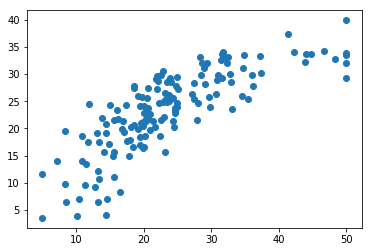

In [143]:
plt.scatter(y_test, predict)

In [144]:
 from sklearn import metrics

In [145]:
metrics.mean_squared_error(y_test, predict)

36.496355341232665

In [146]:
np.sqrt(metrics.mean_squared_error(y_test, predict))

6.041221345161313

# Lasso Regression:

In [136]:
from sklearn.linear_model import Lasso

In [147]:
lasso = Lasso(alpha=.3)

# Train the model using the training sets
lasso.fit(X_train, y_train) 

# Predict the values using the model
lasso_predict = lasso.predict(X_test)

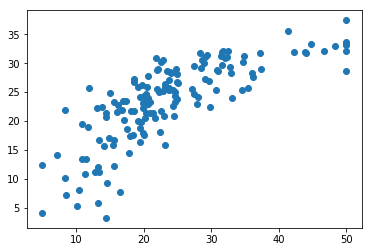

In [150]:
plt.scatter(y_test, lasso_predict)

In [149]:
np.sqrt(metrics.mean_squared_error(y_test, lasso_predict))

6.346379758621026

# Ridge Regression

In [151]:
from sklearn.linear_model import Ridge

In [154]:
rdg = Ridge(fit_intercept=True, alpha=.3)
              
# Train the model using the training sets
rdg.fit(X_train, y_train) 

# Predict the values using the model
rdg_predict = rdg.predict(X_test)

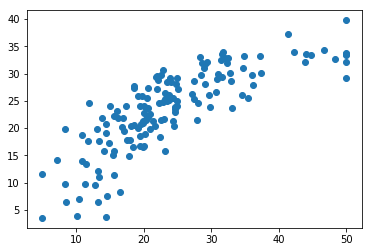

In [155]:
plt.scatter(y_test,rdg_predict)

In [156]:
np.sqrt(metrics.mean_squared_error(y_test, lasso_predict))

6.346379758621026

# Stochastic Gradient Descent

In [161]:
from sklearn.linear_model import SGDRegressor

In [162]:
sgd=SGDRegressor(alpha=.15)

In [163]:
sgd.fit(X_train,y_train)

C:\Users\user\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\user\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.15, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [164]:
sgd_predict=sgd.predict(X_test)

6.346379758621026

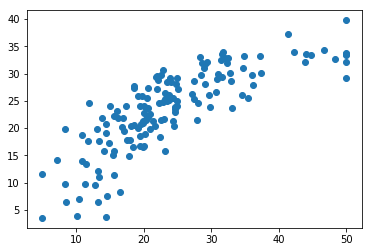

In [166]:
plt.scatter(y_test,rdg_predict)
print('\n')
np.sqrt(metrics.mean_squared_error(y_test, lasso_predict))